In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

            prcp
date            
2017-08-23  0.00
2017-08-23  0.00
2017-08-23  0.08
2017-08-23  0.45
2017-08-22  0.00
...          ...
2017-07-31  0.00
2017-07-31  0.00
2017-07-31  0.00
2017-07-30  0.00
2017-07-30  0.00

[100 rows x 1 columns]


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


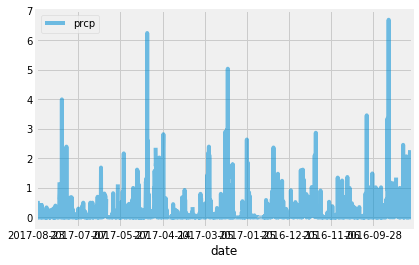

In [36]:

# Precipitation Analysis
# Date query
latest_date = session.query(Measurement.date).\
order_by(Measurement.date.desc()).first()

one_year_from_latest= dt.date(2017, 8, 23) - dt.timedelta(days=366)

# Design a query to retrieve the last 12 months of precipitation data.
percp_data = session.query(Measurement).\
filter(Measurement.date > one_year_from_latest).\
order_by(Measurement.date.desc()).all()

# Select only the `date` and `prcp` values.
date_perc_query = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date > one_year_from_latest)\
.order_by(Measurement.date.desc()).all()


# Load the query results into a Pandas DataFrame and set the index to the date column.
date_percp_df = pd.DataFrame(date_perc_query,columns=['date','prcp'])
date_percp_df.set_index('date', inplace=True)

# Plot the data
date_percp_df.plot(alpha=0.55)

# Use Pandas to print the summary statistics for the precipitation data.
print(date_percp_df.head(100))

date_percp_df.describe()

In [54]:
# Design a query to show how many stations are available in this dataset?
stations_count_query = session.query(Measurement).group_by(Measurement.station).count()
print(f"There are {stations_count_query} stations available in this dataset.")

There are 9 stations available in this dataset.


In [55]:
# What are the most active stations? (what stations have the most rows)? in descending order.

# Query for most active stations
station_count_query = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# Which station has the highest number of observations?
most_active_station = station_count_query[0][0]
print(f"Station {most_active_station} is the most active with: {station_count_query[0][1]}.")

# Print most active stations
station_count_query

Station USC00519281 is the most active with: 2772.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [115]:
# Using the station id from the previous query, calculate the lowest temperature recorded
# highest temperature recorded, and average temperature most active station?

# lowest temperature recorded
lowesttemp_most_active =session.query(Measurement.station,func.min(Measurement.prcp)).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date > one_year_from_latest).\
    order_by(Measurement.date).all()

# highest temperature recorded
highesttemp_most_active =session.query(Measurement.station,func.max(Measurement.prcp)).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date > one_year_from_latest).\
    order_by(Measurement.date).all()

# Average temperature
averagetemp_most_active =session.query(Measurement.station,func.avg(Measurement.prcp)).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date > one_year_from_latest).\
    order_by(Measurement.date).all()


print(f"Station ID: {averagetemp_most_active[0][0]}")
print(f"Lowest temperature recorded: {lowesttemp_most_active[0][1]}")
print(f"Highest temperature recorded: {highesttemp_most_active[0][1]}")
print(f"Average temperature recorded: {averagetemp_most_active[0][1]}")

Station ID: USC00519281
Lowest temperature recorded: 0.0
Highest temperature recorded: 2.98
Average temperature recorded: 0.19894886363636372


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
